## **Blinkit Analysis**


In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
orders = pd.read_csv(r"E:/Amruta Study material/Data Anaylist_WS cube/Capstone Project/Project 3/Blinkit/blinkit_orders.csv")
order_items = pd.read_csv(r"E:/Amruta Study material/Data Anaylist_WS cube/Capstone Project/Project 3/Blinkit/blinkit_order_items.csv")
customers = pd.read_csv(r"E:/Amruta Study material/Data Anaylist_WS cube/Capstone Project/Project 3/Blinkit/blinkit_customers.csv")
feedback = pd.read_csv(r"E:/Amruta Study material/Data Anaylist_WS cube/Capstone Project/Project 3/Blinkit/blinkit_customer_feedback.csv")
product = pd.read_csv(r"E:/Amruta Study material/Data Anaylist_WS cube/Capstone Project/Project 3/Blinkit/blinkit_products.csv")                             
Marketing = pd.read_csv(r"E:/Amruta Study material/Data Anaylist_WS cube/Capstone Project/Project 3/Blinkit/blinkit_marketing_performance.csv")
delivery = pd.read_csv(r"E:/Amruta Study material/Data Anaylist_WS cube/Capstone Project/Project 3/Blinkit/blinkit_delivery_performance.csv")
inventory = pd.read_csv(r"E:/Amruta Study material/Data Anaylist_WS cube/Capstone Project/Project 3/Blinkit/blinkit_inventory.csv")
inventorynew = pd.read_csv(r"E:/Amruta Study material/Data Anaylist_WS cube/Capstone Project/Project 3/Blinkit/blinkit_inventoryNew.csv")

In [10]:
orders.shape

(5000, 10)

## **Import sample data**


In [42]:
orders.head(5)

,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id
0,1961864118,30065862,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,On Time,3197.07,Cash,63230,4771
1,1549769649,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,On Time,976.55,Cash,14983,7534
2,9185164487,45477575,2024-09-23 13:07:12,2024-09-23 13:25:12,2024-09-23 13:29:12,On Time,839.05,UPI,39859,9886
3,9644738826,88067569,2023-11-24 16:16:56,2023-11-24 16:34:56,2023-11-24 16:33:56,On Time,440.23,Card,61497,7917
4,5427684290,83298567,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,On Time,2526.68,Cash,84315,2741


In [43]:
orders.tail(5)

,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id
4995,1669690997,62600289,2023-12-25 15:46:20,2023-12-25 16:05:20,2023-12-25 16:10:20,On Time,1132.33,Cash,90914,1587
4996,8340761903,53640286,2023-11-27 09:18:43,2023-11-27 09:38:43,2023-11-27 09:36:43,On Time,2372.01,Cash,27952,3458
4997,5936301790,87059497,2024-06-21 19:09:09,2024-06-21 19:23:09,2024-06-21 19:26:09,On Time,3158.35,Cash,9590,7424
4998,5710579377,67310893,2024-06-06 14:58:13,2024-06-06 15:12:13,2024-06-06 15:10:13,On Time,1918.92,UPI,29940,6128
4999,2494813730,28663279,2023-08-23 12:04:18,2023-08-23 12:20:18,2023-08-23 12:21:18,On Time,1879.46,Card,32851,5588


## **Data Cleaning**


### **Data information**


In [24]:
orders.info()
print("\n" + "-"*40 + "\n")
order_items.info()
print("\n" + "-"*40 + "\n")
customers.info()
print("\n" + "-"*40 + "\n")
feedback.info()
print("\n" + "-"*40 + "\n")
product.info()
print("\n" + "-"*40 + "\n")
Marketing.info()
print("\n" + "-"*40 + "\n")
delivery.info()
print("\n" + "-"*40 + "\n")
inventory.info()
print("\n" + "-"*40 + "\n")
inventorynew.info()
print("\n" + "-"*40 + "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                5000 non-null   int64  
 1   customer_id             5000 non-null   int64  
 2   order_date              5000 non-null   object 
 3   promised_delivery_time  5000 non-null   object 
 4   actual_delivery_time    5000 non-null   object 
 5   delivery_status         5000 non-null   object 
 6   order_total             5000 non-null   float64
 7   payment_method          5000 non-null   object 
 8   delivery_partner_id     5000 non-null   int64  
 9   store_id                5000 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 390.8+ KB

----------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---

In [29]:
pd.isnull(orders).sum()
pd.isnull(order_items).sum()
pd.isnull(customers).sum()
pd.isnull(feedback).sum()
pd.isnull(product).sum()
pd.isnull(Marketing).sum()
pd.isnull(delivery).sum()
pd.isnull(inventory).sum()
pd.isnull(inventorynew).sum()

product_id        0
date              0
stock_received    0
damaged_stock     0
dtype: int64

## 1 **Orders EDA**

In [38]:
orders.columns

Index(['order_id', 'customer_id', 'order_date', 'promised_delivery_time',
       'actual_delivery_time', 'delivery_status', 'order_total',
       'payment_method', 'delivery_partner_id', 'store_id'],
      dtype='object')

In [41]:
orders.head(10)

,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id
0,1961864118,30065862,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,On Time,3197.07,Cash,63230,4771
1,1549769649,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,On Time,976.55,Cash,14983,7534
2,9185164487,45477575,2024-09-23 13:07:12,2024-09-23 13:25:12,2024-09-23 13:29:12,On Time,839.05,UPI,39859,9886
3,9644738826,88067569,2023-11-24 16:16:56,2023-11-24 16:34:56,2023-11-24 16:33:56,On Time,440.23,Card,61497,7917
4,5427684290,83298567,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,On Time,2526.68,Cash,84315,2741
5,3265154092,43367112,2023-03-18 16:29:51,2023-03-18 16:49:51,2023-03-18 16:48:51,On Time,3161.43,UPI,554,3442
6,4898355547,13284996,2023-04-16 18:50:37,2023-04-16 19:01:37,2023-04-16 19:02:37,On Time,956.40,Card,14630,1318
7,6568151549,88866835,2024-03-31 06:26:48,2024-03-31 06:37:48,2024-03-31 06:39:48,On Time,905.47,Cash,67714,115
8,6006693867,24496983,2023-07-13 23:49:36,2023-07-14 00:02:36,2023-07-14 00:05:36,On Time,1371.17,Card,91362,9021
9,374186990,52215833,2023-08-09 01:17:30,2023-08-09 01:37:30,2023-08-09 01:44:30,Slightly Delayed,1601.19,Wallet,77203,7955


In [44]:
orders.tail(10)

,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id
4990,5053033745,66485571,2024-04-09 13:43:30,2024-04-09 13:59:30,2024-04-09 13:59:30,On Time,2322.30,Card,39933,5629
4991,4859489972,12305040,2023-07-15 17:32:59,2023-07-15 17:42:59,2023-07-15 17:40:59,On Time,2081.40,UPI,14184,1873
4992,9690396315,46563355,2024-09-29 11:06:50,2024-09-29 11:19:50,2024-09-29 11:15:50,On Time,3891.07,Cash,21543,9038
4993,448732557,80952275,2023-11-30 23:44:28,2023-12-01 00:00:28,2023-11-30 23:58:28,On Time,1385.54,Wallet,18718,3163
4994,4927306668,97033691,2023-06-08 23:21:25,2023-06-08 23:32:25,2023-06-08 23:30:25,On Time,898.65,Wallet,69647,4226
4995,1669690997,62600289,2023-12-25 15:46:20,2023-12-25 16:05:20,2023-12-25 16:10:20,On Time,1132.33,Cash,90914,1587
4996,8340761903,53640286,2023-11-27 09:18:43,2023-11-27 09:38:43,2023-11-27 09:36:43,On Time,2372.01,Cash,27952,3458
4997,5936301790,87059497,2024-06-21 19:09:09,2024-06-21 19:23:09,2024-06-21 19:26:09,On Time,3158.35,Cash,9590,7424
4998,5710579377,67310893,2024-06-06 14:58:13,2024-06-06 15:12:13,2024-06-06 15:10:13,On Time,1918.92,UPI,29940,6128
4999,2494813730,28663279,2023-08-23 12:04:18,2023-08-23 12:20:18,2023-08-23 12:21:18,On Time,1879.46,Card,32851,5588


In [36]:
print(orders['order_id'].duplicated().sum())

0


In [51]:
print("\nMissing values per column:")
print(orders.isnull().sum())


Missing values per column:
order_id                  0
customer_id               0
order_date                0
promised_delivery_time    0
actual_delivery_time      0
delivery_status           0
order_total               0
payment_method            0
delivery_partner_id       0
store_id                  0
dtype: int64


#### **Descriptive Statistics for Key Numeric Columns**

In [16]:
orders.describe()

,order_id,customer_id,order_total,delivery_partner_id,store_id
count,5.000000e+03,5.000000e+03,5000.00000,5000.000000,5000.000000
mean,5.029129e+09,5.009685e+07,2201.86170,50050.318200,4999.689000
std,2.863533e+09,2.919082e+07,1303.02438,28802.276922,2886.089242
min,6.046500e+04,3.181300e+04,13.25000,43.000000,1.000000
25%,2.531421e+09,2.404314e+07,1086.21500,24928.500000,2509.250000
50%,5.074378e+09,4.997808e+07,2100.69000,50262.500000,4987.000000
75%,7.488579e+09,7.621215e+07,3156.88250,74478.250000,7500.750000
max,9.998298e+09,9.989390e+07,6721.46000,99968.000000,9995.000000


In [69]:
grouped = orders.groupby('payment_method')['order_total'].sum().reset_index()

Text(0.5, 1.0, 'Total Order by Payment Method')

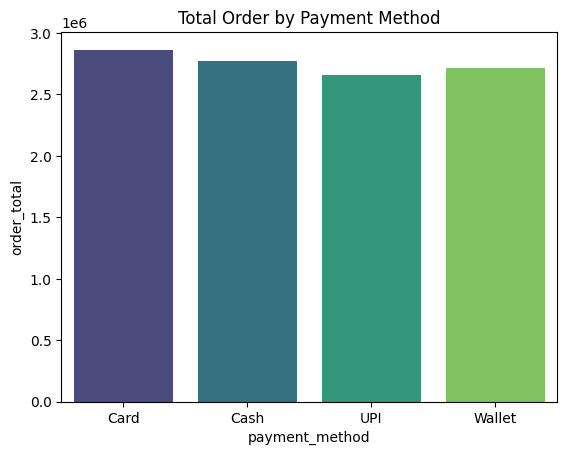

In [77]:
# Total order by payment method
sns.barplot(x ='payment_method', y ='order_total', data=grouped, estimator ="sum", hue ="payment_method", palette = "viridis")
plt.title('Total Order by Payment Method')

## 2 **Product EDA**

In [40]:
product.columns

Index(['product_id', 'product_name', 'category', 'brand', 'price', 'mrp',
       'margin_percentage', 'shelf_life_days', 'min_stock_level',
       'max_stock_level'],
      dtype='object')

In [52]:
product.head(10)

,product_id,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level
0,153019,Onions,Fruits & Vegetables,Aurora LLC,947.95,1263.93,25.0,3,13,88
1,11422,Potatoes,Fruits & Vegetables,Ramaswamy-Tata,127.16,169.55,25.0,3,20,65
2,669378,Potatoes,Fruits & Vegetables,Chadha and Sons,212.14,282.85,25.0,3,23,70
3,848226,Tomatoes,Fruits & Vegetables,Barad and Sons,209.59,279.45,25.0,3,10,51
4,890623,Onions,Fruits & Vegetables,"Sangha, Nagar and Varty",354.52,472.69,25.0,3,27,55
5,965755,Bananas,Fruits & Vegetables,"Doshi, Sarraf and Sama",532.57,710.09,25.0,3,21,91
6,222892,Tomatoes,Fruits & Vegetables,Ramakrishnan-Ghose,869.22,1158.96,25.0,3,28,88
7,516376,Onions,Fruits & Vegetables,Agarwal-Dhar,877.43,1169.91,25.0,3,21,71
8,39154,Mangoes,Fruits & Vegetables,"Suresh, Bose and Bajwa",946.86,1262.48,25.0,3,21,84
9,34186,Mangoes,Fruits & Vegetables,Mandal-Kar,925.65,1234.20,25.0,3,27,74


In [53]:
product.tail(10)

,product_id,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level
258,33797,Pain Reliever,Pharmacy,Gaba LLC,888.12,1110.15,20.0,365,12,51
259,123983,Cough Syrup,Pharmacy,Kurian-Chhabra,785.67,982.09,20.0,365,25,72
260,237083,Cough Syrup,Pharmacy,Hayer-Banerjee,577.13,721.41,20.0,365,24,86
261,154179,Pain Reliever,Pharmacy,"Barad, Devi and Andra",582.87,728.59,20.0,365,10,59
262,298985,Vitamins,Pharmacy,"Ramanathan, Joshi and Srinivasan",183.76,229.70,20.0,365,11,61
263,444361,Pain Reliever,Pharmacy,"Prakash, Bawa and Kale",822.63,1028.29,20.0,365,20,71
264,679284,Cough Syrup,Pharmacy,Pant LLC,877.89,1097.36,20.0,365,28,95
265,240179,Cough Syrup,Pharmacy,Ram-Suri,90.56,113.20,20.0,365,20,56
266,673058,Cough Syrup,Pharmacy,Balan-Madan,765.76,957.20,20.0,365,30,94
267,114414,Vitamins,Pharmacy,Kara-Golla,832.06,1040.07,20.0,365,26,66


In [37]:
print(product['product_id'].duplicated().sum())


0


In [54]:
print("\nMissing values per column:")
print(product.isnull().sum())


Missing values per column:
product_id           0
product_name         0
category             0
brand                0
price                0
mrp                  0
margin_percentage    0
shelf_life_days      0
min_stock_level      0
max_stock_level      0
dtype: int64


#### **Descriptive Statistics for Key Numeric Columns**

In [15]:
product.describe()

,product_id,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,514855.940299,488.356828,680.434739,27.779851,231.757463,20.388060,74.753731
std,291391.529820,298.487200,419.772224,7.458753,151.205830,5.958546,14.591535
min,4452.000000,12.320000,17.600000,15.000000,3.000000,10.000000,50.000000
25%,273697.750000,226.717500,325.150000,20.000000,90.000000,15.000000,63.750000
50%,541459.000000,442.185000,616.970000,30.000000,365.000000,21.000000,73.000000
75%,754334.000000,779.445000,1056.620000,35.000000,365.000000,25.250000,88.000000
max,993331.000000,995.980000,1633.320000,40.000000,365.000000,30.000000,100.000000


## 3 **Order_items EDA**

In [41]:
order_items.columns

Index(['order_id', 'product_id', 'quantity', 'unit_price'], dtype='object')

In [56]:
order_items.head(10)

,order_id,product_id,quantity,unit_price
0,1961864118,642612,3,517.03
1,1549769649,378676,1,881.42
2,9185164487,741341,2,923.84
3,9644738826,561860,1,874.78
4,5427684290,602241,2,976.55
5,3265154092,681063,1,321.28
6,4898355547,56589,3,517.77
7,6568151549,500739,2,359.98
8,6006693867,490939,1,80.25
9,374186990,760828,2,563.45


In [57]:
order_items.tail(10)

,order_id,product_id,quantity,unit_price
4990,5053033745,803607,1,949.73
4991,4859489972,848226,3,209.59
4992,9690396315,812607,2,416.65
4993,448732557,689769,1,46.62
4994,4927306668,540618,2,317.05
4995,1669690997,925482,3,475.04
4996,8340761903,124290,2,39.65
4997,5936301790,491314,3,973.44
4998,5710579377,319388,2,657.80
4999,2494813730,136533,1,826.21


In [58]:
print(order_items['order_id'].duplicated().sum())

0


In [59]:
print("\nMissing values per column:")
print(order_items.isnull().sum())


Missing values per column:
order_id      0
product_id    0
quantity      0
unit_price    0
dtype: int64


#### **Descriptive Statistics for Key Numeric Columns**

In [14]:
order_items.describe()

,order_id,product_id,quantity,unit_price
count,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,5.029129e+09,509974.939600,2.006800,493.157900
std,2.863533e+09,293678.307475,0.820542,298.075647
min,6.046500e+04,4452.000000,1.000000,12.320000
25%,2.531421e+09,257719.000000,1.000000,227.220000
50%,5.074378e+09,540618.000000,2.000000,448.160000
75%,7.488579e+09,747801.000000,3.000000,781.080000
max,9.998298e+09,993331.000000,3.000000,995.980000


## 4 **Marketing_performance EDA**

In [42]:
Marketing.columns

Index(['campaign_id', 'campaign_name', 'date', 'target_audience', 'channel',
       'impressions', 'clicks', 'conversions', 'spend', 'revenue_generated',
       'roas'],
      dtype='object')

In [62]:
Marketing.head(10)

,campaign_id,campaign_name,date,target_audience,channel,impressions,clicks,conversions,spend,revenue_generated,roas
0,548299,New User Discount,2024-11-05,Premium,App,3130,163,78,1431.85,4777.75,3.60
1,390914,Weekend Special,2024-11-05,Inactive,App,3925,494,45,4506.34,6238.11,2.98
2,834385,Festival Offer,2024-11-05,Inactive,Email,7012,370,78,4524.23,2621.00,2.95
3,241523,Flash Sale,2024-11-05,Inactive,SMS,1115,579,86,3622.79,2955.00,2.84
4,595111,Membership Drive,2024-11-05,New Users,Email,7172,795,54,2888.99,8951.81,2.22
5,176344,Category Promotion,2024-11-05,Inactive,App,4333,421,40,2714.78,6697.88,3.89
6,875646,App Push Notification,2024-11-05,Premium,Email,4752,937,21,3584.76,9152.99,2.14
7,5516,Email Campaign,2024-11-05,Premium,Social Media,1559,418,68,1457.88,2156.09,3.92
8,989534,Referral Program,2024-11-05,New Users,SMS,3838,911,45,4808.64,8074.17,1.70
9,243346,New User Discount,2024-11-04,Inactive,SMS,6289,834,14,3746.35,4474.02,2.56


In [63]:
Marketing.tail(10)

,campaign_id,campaign_name,date,target_audience,channel,impressions,clicks,conversions,spend,revenue_generated,roas
5390,835474,Referral Program,2023-03-18,Inactive,Social Media,2333,671,92,1673.17,2489.65,1.53
5391,196046,New User Discount,2023-03-17,Inactive,SMS,8489,529,45,1090.49,2050.84,3.82
5392,77754,Weekend Special,2023-03-17,New Users,Social Media,5675,404,64,3685.09,6883.28,3.89
5393,640799,Festival Offer,2023-03-17,New Users,Email,7462,639,47,2322.43,4769.51,3.57
5394,119887,Flash Sale,2023-03-17,All,App,9057,167,97,4493.34,3860.26,2.84
5395,381623,Membership Drive,2023-03-17,New Users,Email,8331,809,92,2363.07,3710.79,1.64
5396,493317,Category Promotion,2023-03-17,Premium,Social Media,5216,860,34,3922.53,7701.25,2.01
5397,879292,App Push Notification,2023-03-17,All,App,8480,734,20,1990.75,6650.41,3.98
5398,461129,Email Campaign,2023-03-17,New Users,Email,3569,568,10,4246.47,5880.42,2.50
5399,282514,Referral Program,2023-03-17,New Users,Social Media,5967,439,78,1511.93,8322.01,3.08


In [69]:
print(Marketing['campaign_id'].duplicated().sum())

0


In [70]:
print(Marketing['campaign_name'].duplicated().sum())

5391


In [72]:
print("\nMissing values per column:")
print(Marketing.isnull().sum())


Missing values per column:
campaign_id          0
campaign_name        0
date                 0
target_audience      0
channel              0
impressions          0
clicks               0
conversions          0
spend                0
revenue_generated    0
roas                 0
dtype: int64


#### **Descriptive Statistics for Key Numeric Columns**

In [13]:
Marketing.describe()

,campaign_id,impressions,clicks,conversions,spend,revenue_generated,roas
count,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000
mean,501315.219074,5460.668519,550.767593,55.192222,3022.192267,5961.742106,2.740711
std,287611.524258,2571.779820,260.080051,26.150173,1148.732680,2322.242911,0.722986
min,243.000000,1002.000000,100.000000,10.000000,1000.630000,2003.100000,1.500000
25%,249200.000000,3231.500000,322.000000,32.000000,2029.070000,3907.240000,2.120000
50%,505012.500000,5457.500000,555.000000,55.000000,3042.485000,5935.940000,2.725000
75%,752219.250000,7676.250000,772.000000,78.000000,4011.572500,7973.712500,3.370000
max,999950.000000,9999.000000,1000.000000,100.000000,4997.550000,9999.540000,4.000000


##  5**Delivery performance EDA**

In [43]:
delivery.columns

Index(['order_id', 'delivery_partner_id', 'promised_time', 'actual_time',
       'delivery_time_minutes', 'distance_km', 'delivery_status',
       'reasons_if_delayed'],
      dtype='object')

In [76]:
delivery.head(10)

,order_id,delivery_partner_id,promised_time,actual_time,delivery_time_minutes,distance_km,delivery_status,reasons_if_delayed
0,1961864118,63230,2024-07-17 08:52:01,2024-07-17 08:47:01,-5.0,0.96,On Time,NaN
1,1549769649,14983,2024-05-28 13:25:29,2024-05-28 13:27:29,2.0,0.98,On Time,Traffic
2,9185164487,39859,2024-09-23 13:25:12,2024-09-23 13:29:12,4.0,3.83,On Time,Traffic
3,9644738826,61497,2023-11-24 16:34:56,2023-11-24 16:33:56,-1.0,2.76,On Time,NaN
4,5427684290,84315,2023-11-20 05:17:39,2023-11-20 05:18:39,1.0,2.63,On Time,Traffic
5,3265154092,554,2023-03-18 16:49:51,2023-03-18 16:48:51,-1.0,1.94,On Time,NaN
6,4898355547,14630,2023-04-16 19:01:37,2023-04-16 19:02:37,1.0,2.20,On Time,Traffic
7,6568151549,67714,2024-03-31 06:37:48,2024-03-31 06:39:48,2.0,1.30,On Time,Traffic
8,6006693867,91362,2023-07-14 00:02:36,2023-07-14 00:05:36,3.0,3.38,On Time,Traffic
9,374186990,77203,2023-08-09 01:37:30,2023-08-09 01:44:30,7.0,1.47,Slightly Delayed,Traffic


In [77]:
delivery.tail(10)

,order_id,delivery_partner_id,promised_time,actual_time,delivery_time_minutes,distance_km,delivery_status,reasons_if_delayed
4990,5053033745,39933,2024-04-09 13:59:30,2024-04-09 13:59:30,0.0,1.31,On Time,NaN
4991,4859489972,14184,2023-07-15 17:42:59,2023-07-15 17:40:59,-2.0,3.04,On Time,NaN
4992,9690396315,21543,2024-09-29 11:19:50,2024-09-29 11:15:50,-4.0,3.24,On Time,NaN
4993,448732557,18718,2023-12-01 00:00:28,2023-11-30 23:58:28,-2.0,3.93,On Time,NaN
4994,4927306668,69647,2023-06-08 23:32:25,2023-06-08 23:30:25,-2.0,1.12,On Time,NaN
4995,1669690997,90914,2023-12-25 16:05:20,2023-12-25 16:10:20,5.0,1.86,On Time,Traffic
4996,8340761903,27952,2023-11-27 09:38:43,2023-11-27 09:36:43,-2.0,3.31,On Time,NaN
4997,5936301790,9590,2024-06-21 19:23:09,2024-06-21 19:26:09,3.0,2.44,On Time,Traffic
4998,5710579377,29940,2024-06-06 15:12:13,2024-06-06 15:10:13,-2.0,1.76,On Time,NaN
4999,2494813730,32851,2023-08-23 12:20:18,2023-08-23 12:21:18,1.0,2.70,On Time,Traffic


In [78]:
print(delivery['order_id'].duplicated().sum())

0


In [81]:
print("\nMissing values per column:")
print(delivery.isnull().sum())


Missing values per column:
order_id                    0
delivery_partner_id         0
promised_time               0
actual_time                 0
delivery_time_minutes       0
distance_km                 0
delivery_status             0
reasons_if_delayed       1902
dtype: int64


#### **replace "others" with "nan" value**

In [8]:
delivery['reasons_if_delayed'] = delivery['reasons_if_delayed'].fillna('Others')


In [9]:
delivery.head(10)

,order_id,delivery_partner_id,promised_time,actual_time,delivery_time_minutes,distance_km,delivery_status,reasons_if_delayed
0,1961864118,63230,2024-07-17 08:52:01,2024-07-17 08:47:01,-5.0,0.96,On Time,Others
1,1549769649,14983,2024-05-28 13:25:29,2024-05-28 13:27:29,2.0,0.98,On Time,Traffic
2,9185164487,39859,2024-09-23 13:25:12,2024-09-23 13:29:12,4.0,3.83,On Time,Traffic
3,9644738826,61497,2023-11-24 16:34:56,2023-11-24 16:33:56,-1.0,2.76,On Time,Others
4,5427684290,84315,2023-11-20 05:17:39,2023-11-20 05:18:39,1.0,2.63,On Time,Traffic
5,3265154092,554,2023-03-18 16:49:51,2023-03-18 16:48:51,-1.0,1.94,On Time,Others
6,4898355547,14630,2023-04-16 19:01:37,2023-04-16 19:02:37,1.0,2.20,On Time,Traffic
7,6568151549,67714,2024-03-31 06:37:48,2024-03-31 06:39:48,2.0,1.30,On Time,Traffic
8,6006693867,91362,2023-07-14 00:02:36,2023-07-14 00:05:36,3.0,3.38,On Time,Traffic
9,374186990,77203,2023-08-09 01:37:30,2023-08-09 01:44:30,7.0,1.47,Slightly Delayed,Traffic


##### **Descriptive Statistics for Key Numeric Columns**

In [10]:
delivery.describe()

,order_id,delivery_partner_id,delivery_time_minutes,distance_km
count,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,5.029129e+09,50050.318200,4.443000,2.718048
std,2.863533e+09,28802.276922,8.063929,1.290306
min,6.046500e+04,43.000000,-5.000000,0.500000
25%,2.531421e+09,24928.500000,-1.000000,1.590000
50%,5.074378e+09,50262.500000,2.000000,2.690000
75%,7.488579e+09,74478.250000,8.000000,3.850000
max,9.998298e+09,99968.000000,30.000000,5.000000


#### **Visualistion on delivery time by delivery status**

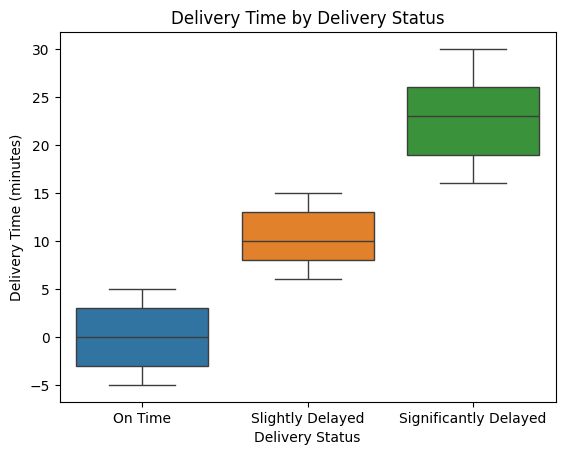

In [83]:
sns.boxplot(x='delivery_status', y='delivery_time_minutes', data=delivery, hue = 'delivery_status')
plt.title('Delivery Time by Delivery Status')
plt.xlabel('Delivery Status')
plt.ylabel('Delivery Time (minutes)')
plt.show()


#### **Delivery time vs. distance**

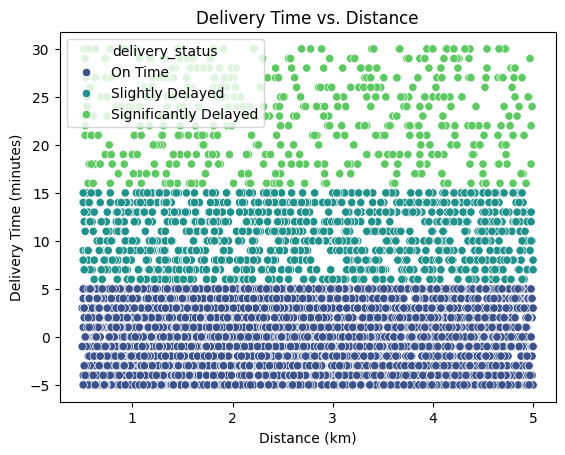

In [101]:
sns.scatterplot(x='distance_km', y='delivery_time_minutes', hue='delivery_status', data=delivery,palette = 'viridis')
plt.title('Delivery Time vs. Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Delivery Time (minutes)')
plt.show()


### 6 **Inventory EDA**

In [45]:
inventory.columns

Index(['product_id', 'date', 'stock_received', 'damaged_stock'], dtype='object')

In [17]:
inventory.head(10)

,product_id,date,stock_received,damaged_stock
0,153019,17-03-2023,4,2
1,848226,17-03-2023,4,2
2,965755,17-03-2023,1,0
3,39154,17-03-2023,4,0
4,34186,17-03-2023,3,2
5,478531,17-03-2023,4,2
6,812607,17-03-2023,4,0
7,818990,17-03-2023,4,0
8,14145,17-03-2023,0,2
9,847349,17-03-2023,0,2


In [18]:
inventory.tail(10)

,product_id,date,stock_received,damaged_stock
75162,137909,05-11-2024,0,2
75163,799459,05-11-2024,4,0
75164,56589,05-11-2024,3,0
75165,26060,05-11-2024,4,0
75166,154179,05-11-2024,0,2
75167,298985,05-11-2024,3,0
75168,679284,05-11-2024,3,0
75169,240179,05-11-2024,3,0
75170,673058,05-11-2024,3,2
75171,114414,05-11-2024,3,0


In [19]:
print(inventory['product_id'].duplicated().sum())

74904


In [20]:
print("\nMissing values per column:")
print(inventory.isnull().sum())


Missing values per column:
product_id        0
date              0
stock_received    0
damaged_stock     0
dtype: int64


#### **Descriptive Statistics for Key Numeric Columns**

In [21]:
inventory.describe()

,product_id,stock_received,damaged_stock
count,75172.000000,75172.000000,75172.000000
mean,514290.353097,1.962513,1.067791
std,291277.971875,1.639961,0.997706
min,4452.000000,0.000000,0.000000
25%,272170.000000,0.000000,0.000000
50%,542300.000000,3.000000,2.000000
75%,753354.000000,3.000000,2.000000
max,993331.000000,4.000000,2.000000


### 7 **InventoryNew EDA**

In [46]:
inventorynew.columns

Index(['product_id', 'date', 'stock_received', 'damaged_stock'], dtype='object')

In [22]:
inventorynew.head(10)

,product_id,date,stock_received,damaged_stock
0,153019,Mar-23,4,1
1,848226,Mar-23,4,1
2,965755,Mar-23,1,0
3,39154,Mar-23,4,0
4,34186,Mar-23,3,1
5,478531,Mar-23,4,1
6,812607,Mar-23,4,0
7,818990,Mar-23,4,0
8,284460,Mar-23,4,0
9,654297,Mar-23,4,1


In [23]:
inventorynew.tail(10)

,product_id,date,stock_received,damaged_stock
18095,525531,Nov-24,3,0
18096,913428,Nov-24,3,0
18097,425341,Nov-24,3,0
18098,723678,Nov-24,3,0
18099,557908,Nov-24,3,0
18100,837480,Nov-24,3,0
18101,56589,Nov-24,3,0
18102,679284,Nov-24,3,0
18103,673058,Nov-24,3,0
18104,114414,Nov-24,3,0


In [30]:
print(inventorynew.duplicated().sum())

7359


In [25]:
print("\nMissing values per column:")
print(inventorynew.isnull().sum())


Missing values per column:
product_id        0
date              0
stock_received    0
damaged_stock     0
dtype: int64


#### **Descriptive Statistics for Key Numeric Columns**

In [26]:
inventorynew.describe()

,product_id,stock_received,damaged_stock
count,18105.000000,18105.000000,18105.000000
mean,514273.410163,1.589561,0.061254
std,290295.868498,0.797942,0.265387
min,4452.000000,1.000000,0.000000
25%,274207.000000,1.000000,0.000000
50%,540618.000000,1.000000,0.000000
75%,753354.000000,2.000000,0.000000
max,993331.000000,4.000000,7.000000


#### 8 **Customer EDA**

In [48]:
customers.columns

Index(['customer_id', 'customer_name', 'email', 'phone', 'address', 'area',
       'pincode', 'registration_date', 'customer_segment', 'total_orders',
       'avg_order_value'],
      dtype='object')

In [27]:
customers.head(10)

,customer_id,customer_name,email,phone,address,area,pincode,registration_date,customer_segment,total_orders,avg_order_value
0,97475543,Niharika Nagi,ektataneja@example.org,912987579691,"23, Nayar Path, Bihar Sharif-154625",Udupi,321865,2023-05-13,Premium,13,451.92
1,22077605,Megha Sachar,vedant45@example.com,915123179717,"51/302, Buch Chowk\nSrinagar-570271",Aligarh,149394,2024-06-18,Inactive,4,825.48
2,47822591,Hema Bahri,samiazaan@example.com,910034076149,"941\nAnne Street, Darbhanga 186125",Begusarai,621411,2024-09-25,Regular,17,1969.81
3,79726146,Zaitra Vig,ishanvi87@example.org,916264232390,"43/94, Ghosh, Alappuzha 635655",Kozhikode,826054,2023-10-04,New,4,220.09
4,57102800,Januja Verma,atideshpande@example.org,917293526596,"06\nOm, Ambarnath 477463",Ichalkaranji,730539,2024-03-22,Inactive,14,578.14
5,54748429,Darsh More,ynayar@example.org,912582120513,"26/961\nSalvi Circle, Durg 406361",Visakhapatnam,883122,2024-04-22,New,2,669.35
6,49152878,Patrick Sandhu,zehaanmahajan@example.org,912413014420,"304\nTara Road, Gandhinagar-559930",Gwalior,649817,2024-09-13,Premium,4,973.62
7,16379942,Harshil Kuruvilla,pathakanirudh@example.org,913807361990,"37/62, Basu Chowk\nSikar 515907",Orai,332997,2024-04-10,Inactive,15,1370.56
8,11071601,Ojas Ahuja,sneha11@example.com,912865080618,H.No. 99\nKade Road\nRamgarh 695009,Buxar,528426,2023-07-04,Inactive,17,1950.54
9,68164013,Netra Chander,hwarrior@example.org,917645901970,"H.No. 94\nGupta Path, Hospet-831040",Malegaon,4515,2023-06-29,New,1,1061.82


In [28]:
customers.tail(10)

,customer_id,customer_name,email,phone,address,area,pincode,registration_date,customer_segment,total_orders,avg_order_value
2490,94404245,Quincy Chauhan,kadetamanna@example.com,911392035916,01\nHayer Chowk\nGopalpur 936167,Rampur,630779,2024-05-14,Inactive,5,564.03
2491,97484394,Ayush Choudhry,deoikshita@example.org,919444247870,"57/065, Gala Path\nHindupur 640702",Jaipur,577563,2024-04-05,Inactive,4,669.01
2492,66827191,Om Bhatia,manineelima@example.com,912414654009,H.No. 33\nDevi Ganj\nArrah 827426,Alwar,409528,2023-11-19,New,11,1808.42
2493,50554007,Ekaja Pillai,abhakaul@example.com,914597059930,"H.No. 214, Divan Road\nHindupur 028048",Baranagar,534970,2023-04-04,Premium,5,1597.14
2494,65895091,Chaitaly Shere,vedhikakeer@example.com,919296110004,"H.No. 021\nBalan Road, Kadapa-276118",Orai,59036,2023-11-11,Inactive,8,1634.33
2495,48002829,Daksh Mandal,varkeymohammed@example.com,919587731286,"28/42, Venkataraman Ganj, Kishanganj-360157",Mumbai,45238,2024-01-25,Inactive,17,754.33
2496,57392064,Lavanya Jain,deshpandeom@example.com,916137420258,"391, Edwin Path, Korba 202726",Udupi,688100,2024-06-23,Regular,4,1540.81
2497,71688530,Umang Dash,gokhalenicholas@example.org,917595275963,"151, Parmer Ganj\nLoni 906431",Kavali,528749,2024-03-18,Regular,1,1541.22
2498,89051578,Zinal Natarajan,vyasfrado@example.com,911994009448,"H.No. 172, Khanna Street, Pudukkottai 610564",Alwar,586734,2024-09-06,Premium,12,1185.50
2499,78738569,Eiravati Sundaram,onkar24@example.com,914320353753,"H.No. 791, Sur Path\nBally 982559",Dewas,342448,2023-05-10,Inactive,4,376.50


In [29]:
print(customers.duplicated().sum())

0


In [31]:
print("\nMissing values per column:")
print(customers.isnull().sum())


Missing values per column:
customer_id          0
customer_name        0
email                0
phone                0
address              0
area                 0
pincode              0
registration_date    0
customer_segment     0
total_orders         0
avg_order_value      0
dtype: int64


#### **Descriptive Statistics for Key Numeric Columns**

In [32]:
customers.describe()

,customer_id,phone,pincode,total_orders,avg_order_value
count,2.500000e+03,2.500000e+03,2500.000000,2500.000000,2500.000000
mean,4.989961e+07,9.150532e+11,497653.183200,10.491600,1102.375836
std,2.919266e+07,2.882835e+09,281167.293249,5.805533,523.043183
min,3.181300e+04,9.100132e+11,666.000000,1.000000,200.430000
25%,2.402443e+07,9.125946e+11,257079.750000,6.000000,631.817500
50%,5.000044e+07,9.150236e+11,498662.000000,10.000000,1118.650000
75%,7.595459e+07,9.176256e+11,740668.000000,16.000000,1565.400000
max,9.989390e+07,9.199988e+11,999631.000000,20.000000,1999.830000


#### **Bar Chart of Total Orders by Customer Segment**

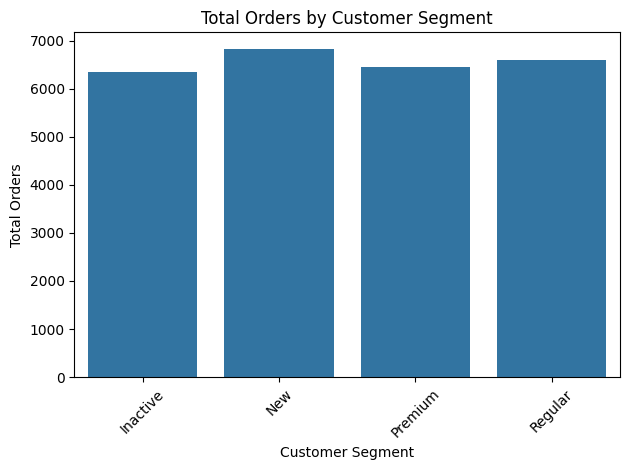

In [107]:
sns.barplot(x='customer_segment', y='total_orders', data=segment_orders)
plt.title('Total Orders by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Orders')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

### 9 **Customers Feedback EDA**

In [49]:
feedback.columns

Index(['feedback_id', 'order_id', 'customer_id', 'rating', 'feedback_text',
       'feedback_category', 'sentiment', 'feedback_date'],
      dtype='object')

In [33]:
feedback.head(10)

,feedback_id,order_id,customer_id,rating,feedback_text,feedback_category,sentiment,feedback_date
0,2234710,1961864118,30065862,4,"It was okay, nothing special.",Delivery,Neutral,2024-07-17
1,5450964,1549769649,9573071,3,The order was incorrect.,App Experience,Negative,2024-05-28
2,482108,9185164487,45477575,3,"It was okay, nothing special.",App Experience,Neutral,2024-09-23
3,4823104,9644738826,88067569,4,The product met my expectations.,App Experience,Neutral,2023-11-24
4,3537464,5427684290,83298567,3,Product was damaged during delivery.,Delivery,Negative,2023-11-20
5,4089724,3265154092,43367112,2,Product was damaged during delivery.,Customer Service,Negative,2023-03-18
6,230696,4898355547,13284996,4,Highly recommended!,Product Quality,Positive,2023-04-16
7,2259308,6568151549,88866835,2,I had a bad experience.,App Experience,Negative,2024-03-31
8,7380970,6006693867,24496983,3,Product was damaged during delivery.,Delivery,Negative,2023-07-14
9,2257242,374186990,52215833,3,The product met my expectations.,App Experience,Neutral,2023-08-09


In [34]:
feedback.tail(10)

,feedback_id,order_id,customer_id,rating,feedback_text,feedback_category,sentiment,feedback_date
4990,9432013,5053033745,66485571,5,"Excellent quality, will buy again!",Product Quality,Positive,2024-04-09
4991,5963618,4859489972,12305040,1,Taste was not as expected.,Product Quality,Negative,2023-07-15
4992,9054314,9690396315,46563355,3,Taste was not as expected.,App Experience,Negative,2024-09-29
4993,4172796,448732557,80952275,3,I had a bad experience.,Delivery,Negative,2023-11-30
4994,6844012,4927306668,97033691,3,"Average experience, could improve.",App Experience,Neutral,2023-06-08
4995,9024060,1669690997,62600289,3,Taste was not as expected.,Product Quality,Negative,2023-12-25
4996,4715968,8340761903,53640286,3,"Average experience, could improve.",Product Quality,Neutral,2023-11-27
4997,9621021,5936301790,87059497,4,"Average experience, could improve.",App Experience,Neutral,2024-06-21
4998,1134095,5710579377,67310893,4,"Average experience, could improve.",Delivery,Neutral,2024-06-06
4999,6578433,2494813730,28663279,4,"It was okay, nothing special.",Customer Service,Neutral,2023-08-23


In [35]:
print(feedback.duplicated().sum())

0


In [36]:
print("\nMissing values per column:")
print(feedback.isnull().sum())


Missing values per column:
feedback_id          0
order_id             0
customer_id          0
rating               0
feedback_text        0
feedback_category    0
sentiment            0
feedback_date        0
dtype: int64


#### **Descriptive Statistics for Key Numeric Columns**

In [37]:
feedback.describe()

,feedback_id,order_id,customer_id,rating
count,5.000000e+03,5.000000e+03,5.000000e+03,5000.00000
mean,5.013616e+06,5.029129e+09,5.009685e+07,3.34440
std,2.857341e+06,2.863533e+09,2.919082e+07,1.18982
min,9.470000e+02,6.046500e+04,3.181300e+04,1.00000
25%,2.576690e+06,2.531421e+09,2.404314e+07,3.00000
50%,5.005833e+06,5.074378e+09,4.997808e+07,4.00000
75%,7.486478e+06,7.488579e+09,7.621215e+07,4.00000
max,9.999293e+06,9.998298e+09,9.989390e+07,5.00000


### **Sentiment Analysis & Text processing**

In [109]:
pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 8.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [110]:
pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 6.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import nltk
import textblob

In [4]:
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AMRUTA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AMRUTA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [140]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\AMRUTA\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\AMRUTA\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\AMRUTA\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\AMRUTA\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\AMRUTA\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       

True

In [141]:
sentence = "Hello world!"
tokens = word_tokenize(sentence)
print(tokens)

['Hello', 'world', '!']


#### **Text Preprocessing**

In [126]:
# feedback = pd.read_csv('customer_feedback.csv')
feedback = pd.read_csv(r"E:/Amruta Study material/Data Anaylist_WS cube/Capstone Project/Project 3/Blinkit/blinkit_customer_feedback.csv")

### **clean the text**

In [142]:
stop_words = set(stopwords.words('english'))
words = word_tokenize(all_text.lower())
words = [word for word in words if word.isalpha() and word not in stop_words]

In [143]:
# join all text column togather
all_text = ' '.join(feedback['feedback_text'].dropna().astype(str))

In [148]:
# Most common feedback
words_counts = Counter(words)
common_words = words_counts.most_common(20)
print("Most common words in feedback:")
for words, count in common_words:
    print(f"{words}: {count}")

Most common words in feedback:
nothing: 1065
product: 874
delivery: 833
experience: 675
could: 653
order: 502
service: 457
met: 386
expectations: 386
complain: 366
exceptional: 366
average: 343
improve: 343
okay: 333
special: 333
good: 333
quality: 329
fine: 310
better: 310
items: 302


In [9]:
import matplotlib.pyplot as plt
from textblob import TextBlob

In [158]:
words_df = pd.DataFrame(common_words, columns=['word', 'count'])

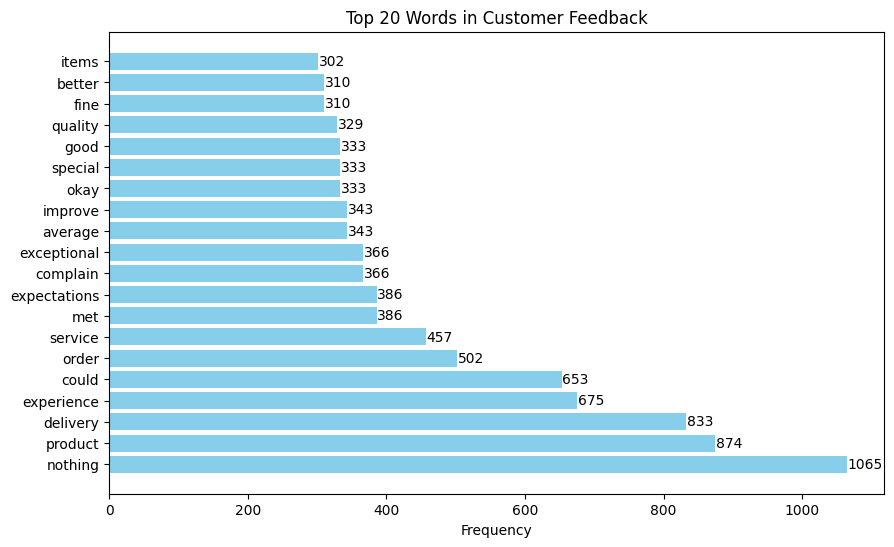

In [163]:
plt.figure(figsize=(10, 6))
bars = plt.barh(words_df['word'], words_df['count'], color='skyblue')
plt.xlabel("Frequency")
plt.title("Top 20 Words in Customer Feedback")
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, 
             str(int(bar.get_width())), va='center')

#### **Analyze customer feedback text for common themes or frequent words (using basic text processing) Correlate sentiment scores with order values or delivery delays**

In [168]:
#calculate polarity and subjectivity from each feedback.
feedback['feedback_text'] = feedback['feedback_text'].fillna('')
feedback['sentiment_polarity'] = feedback['feedback_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
feedback['sentiment_subjectivity'] = feedback['feedback_text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
print(feedback)

      feedback_id    order_id  customer_id  rating  \
0         2234710  1961864118     30065862       4   
1         5450964  1549769649      9573071       3   
2          482108  9185164487     45477575       3   
3         4823104  9644738826     88067569       4   
4         3537464  5427684290     83298567       3   
...           ...         ...          ...     ...   
4995      9024060  1669690997     62600289       3   
4996      4715968  8340761903     53640286       3   
4997      9621021  5936301790     87059497       4   
4998      1134095  5710579377     67310893       4   
4999      6578433  2494813730     28663279       4   

                             feedback_text feedback_category sentiment  \
0            It was okay, nothing special.          Delivery   Neutral   
1                 The order was incorrect.    App Experience  Negative   
2            It was okay, nothing special.    App Experience   Neutral   
3         The product met my expectations.    App Exper

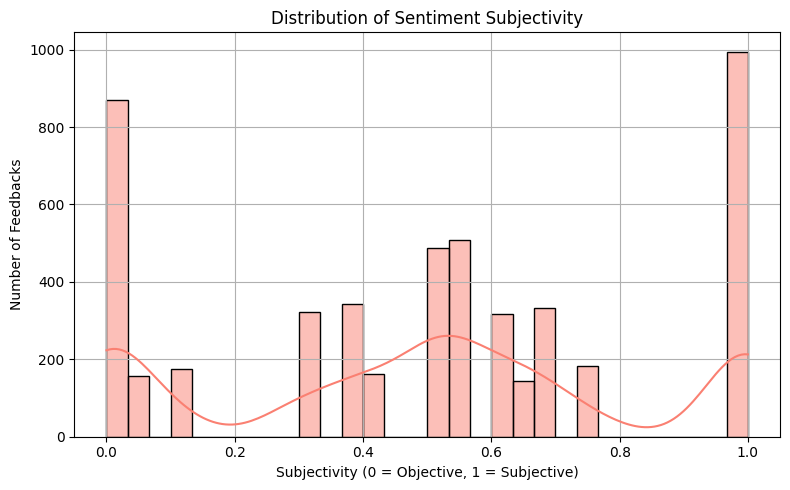

In [169]:
plt.figure(figsize=(8, 5))
sns.histplot(feedback['sentiment_subjectivity'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Sentiment Subjectivity')
plt.xlabel('Subjectivity (0 = Objective, 1 = Subjective)')
plt.ylabel('Number of Feedbacks')
plt.grid(True)
plt.tight_layout()
plt.show()


#### **Correlation in sentiment scores with order values or delivery delays**

In [174]:
# join the feedback along with order value & delivery status
feedback_ordervalue = pd.merge(feedback,
    orders[['order_id', 'order_total']],
    on='order_id', how='left'
)
feedback_delivery = pd.merge(
    feedback_ordervalue,
    delivery[['order_id', 'delivery_time_minutes']],
    on='order_id', how='left'
)
print(feedback_delivery)

      feedback_id    order_id  customer_id  rating  \
0         2234710  1961864118     30065862       4   
1         5450964  1549769649      9573071       3   
2          482108  9185164487     45477575       3   
3         4823104  9644738826     88067569       4   
4         3537464  5427684290     83298567       3   
...           ...         ...          ...     ...   
4995      9024060  1669690997     62600289       3   
4996      4715968  8340761903     53640286       3   
4997      9621021  5936301790     87059497       4   
4998      1134095  5710579377     67310893       4   
4999      6578433  2494813730     28663279       4   

                             feedback_text feedback_category sentiment  \
0            It was okay, nothing special.          Delivery   Neutral   
1                 The order was incorrect.    App Experience  Negative   
2            It was okay, nothing special.    App Experience   Neutral   
3         The product met my expectations.    App Exper

In [178]:
# calculate the correlation
correlation_matrix = print("\nCorrelation between sentiment polarity and order total:")
print(feedback_ordervalue[['sentiment_polarity', 'order_total']].corr())
print(correlation_matrix)


Correlation between sentiment polarity and order total:
                    sentiment_polarity  order_total
sentiment_polarity            1.000000    -0.004284
order_total                  -0.004284     1.000000
None


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

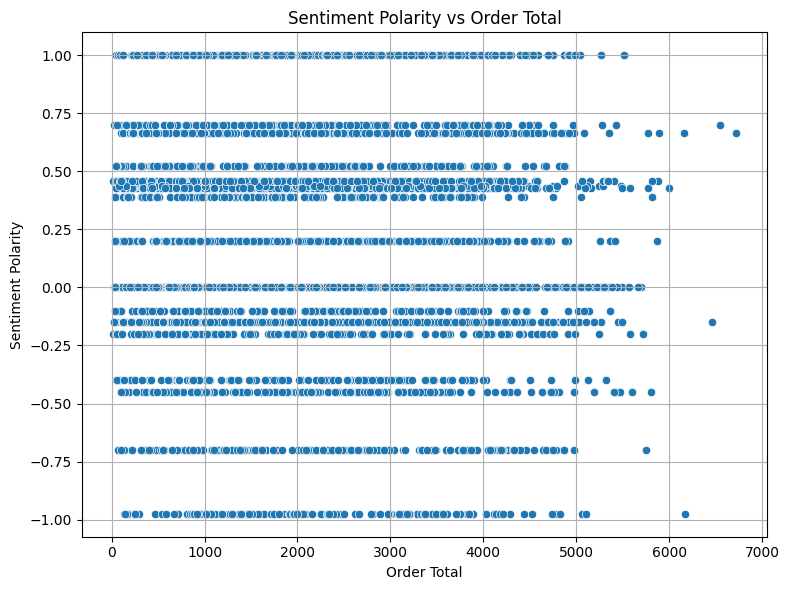

In [190]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=feedback_ordervalue, x='order_total', y='sentiment_polarity')
plt.title('Sentiment Polarity vs Order Total')
plt.xlabel('Order Total')
plt.ylabel('Sentiment Polarity')
plt.grid(True)
plt.tight_layout()
plt.show()

In [179]:
correlation_matrix = print("\nCorrelation between sentiment polarity and order total:")
print(feedback_delivery[['sentiment_polarity', 'order_total']].corr())
print(correlation_matrix)


Correlation between sentiment polarity and order total:
                    sentiment_polarity  order_total
sentiment_polarity            1.000000    -0.004284
order_total                  -0.004284     1.000000
None


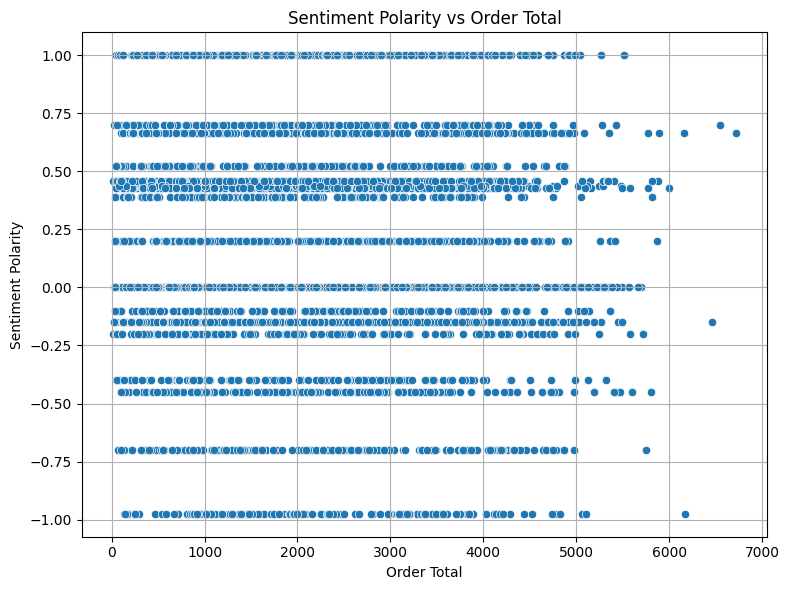

In [192]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=feedback_delivery, x='order_total', y='sentiment_polarity')
plt.title('Sentiment Polarity vs Order Total')
plt.xlabel('Order Total')
plt.ylabel('Sentiment Polarity')
plt.grid(True)
plt.tight_layout()
plt.show()

## 3 **Delivery Time Prediction Model**

In [5]:
delivery.info()
print("\n" + "-"*40 + "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               5000 non-null   int64  
 1   delivery_partner_id    5000 non-null   int64  
 2   promised_time          5000 non-null   object 
 3   actual_time            5000 non-null   object 
 4   delivery_time_minutes  5000 non-null   float64
 5   distance_km            5000 non-null   float64
 6   delivery_status        5000 non-null   object 
 7   reasons_if_delayed     3098 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 312.6+ KB

----------------------------------------



In [6]:
#Select relevant features for calculation 
features = ['distance_km', 'promised_time_minutes', 'delivery_partner']  # Add/remove as needed
target = 'delivery_time_minutes'

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error

In [8]:
delivery.head(5)

,order_id,delivery_partner_id,promised_time,actual_time,delivery_time_minutes,distance_km,delivery_status,reasons_if_delayed
0,1961864118,63230,2024-07-17 08:52:01,2024-07-17 08:47:01,-5.0,0.96,On Time,NaN
1,1549769649,14983,2024-05-28 13:25:29,2024-05-28 13:27:29,2.0,0.98,On Time,Traffic
2,9185164487,39859,2024-09-23 13:25:12,2024-09-23 13:29:12,4.0,3.83,On Time,Traffic
3,9644738826,61497,2023-11-24 16:34:56,2023-11-24 16:33:56,-1.0,2.76,On Time,NaN
4,5427684290,84315,2023-11-20 05:17:39,2023-11-20 05:18:39,1.0,2.63,On Time,Traffic


In [10]:
# Load required data from delivery data
delivery = pd.read_csv(r"E:/Amruta Study material/Data Anaylist_WS cube/Capstone Project/Project 3/Blinkit/blinkit_delivery_performance.csv")

# Display required columns 
print(delivery.columns)
print(delivery.head())

Index(['order_id', 'delivery_partner_id', 'promised_time', 'actual_time',
       'delivery_time_minutes', 'distance_km', 'delivery_status',
       'reasons_if_delayed'],
      dtype='object')
     order_id  delivery_partner_id        promised_time          actual_time  \
0  1961864118                63230  2024-07-17 08:52:01  2024-07-17 08:47:01   
1  1549769649                14983  2024-05-28 13:25:29  2024-05-28 13:27:29   
2  9185164487                39859  2024-09-23 13:25:12  2024-09-23 13:29:12   
3  9644738826                61497  2023-11-24 16:34:56  2023-11-24 16:33:56   
4  5427684290                84315  2023-11-20 05:17:39  2023-11-20 05:18:39   

   delivery_time_minutes  distance_km delivery_status reasons_if_delayed  
0                   -5.0         0.96         On Time                NaN  
1                    2.0         0.98         On Time            Traffic  
2                    4.0         3.83         On Time            Traffic  
3                   -1.0   

In [11]:
# Create merged_delivery to club all required column all togather
merged_delivery = delivery.copy()

In [12]:
# required columns
required = ['distance_km', 'promised_time', 'delivery_partner_id', 'delivery_time_minutes']
missing = [col for col in required if col not in merged_delivery.columns]
print("Missing columns:", missing)

Missing columns: []


In [13]:
# Feature engineering- extract date time feature
X = merged_delivery[['distance_km', 'promised_time', 'delivery_partner_id']].copy()
y = merged_delivery['delivery_time_minutes']

In [14]:
#Convert 'promised_deliverytime' to datetime and extract hour, day of week
X['promised_time'] = pd.to_datetime(X['promised_time'])
X['hour_of_day'] = X['promised_time'].dt.hour
X['day_of_week'] = X['promised_time'].dt.dayofweek
X = X.drop('promised_time', axis=1)

In [15]:
# define encode 'delivery_partner_id'
X = pd.get_dummies(X, columns=['delivery_partner_id'], drop_first=True)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

In [25]:
# Split and train regression model
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

### **remaning part of this project run in blinkit project v1 file,due to space issue generated another file**